In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [2]:
df = pd.read_csv('Loan_Data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(381, 13)

In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
df = df.drop('Loan_ID', axis=1)

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [11]:
df = df.dropna(subset = ['Gender', 'Dependents', 'Loan_Amount_Term'])

In [12]:
df.shape

(358, 12)

In [13]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df['Self_Employed'].mode()[0]

'No'

In [16]:
df['Credit_History'].unique()

array([ 1., nan,  0.])

In [17]:
df['Credit_History'].mode()[0]

np.float64(1.0)

In [18]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_3156\2638902035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
C:\Users\shiva\AppData\Local\Temp\ipykernel_3156\2638902035.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [19]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             358 non-null    object 
 1   Married            358 non-null    object 
 2   Dependents         358 non-null    object 
 3   Education          358 non-null    object 
 4   Self_Employed      358 non-null    object 
 5   ApplicantIncome    358 non-null    int64  
 6   CoapplicantIncome  358 non-null    float64
 7   LoanAmount         358 non-null    float64
 8   Loan_Amount_Term   358 non-null    float64
 9   Credit_History     358 non-null    float64
 10  Property_Area      358 non-null    object 
 11  Loan_Status        358 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 36.4+ KB


In [21]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [23]:
df['Dependents'].replace('3+', '4', inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_3156\2245831984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', '4', inplace=True)


In [24]:
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [25]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
encoding = {
    'Gender': {'Male':1, 'Female':0},
    'Married': {'Yes':1, 'No':0},
    'Dependents': {'0':1, '1':1, '2':2, '4':4},
    'Education': {'Graduate':1, 'Not Graduate':0},
    'Self_Employed': {'Yes':1, 'No':0},
    'Property_Area': {'Rural':0, 'Semiurban':2, 'Urban':1},
    'Loan_Status': {'Y':1, 'N':0}
}

In [27]:
df.replace(encoding, inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_3156\3659977363.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding, inplace=True)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             358 non-null    int64  
 1   Married            358 non-null    int64  
 2   Dependents         358 non-null    int64  
 3   Education          358 non-null    int64  
 4   Self_Employed      358 non-null    int64  
 5   ApplicantIncome    358 non-null    int64  
 6   CoapplicantIncome  358 non-null    float64
 7   LoanAmount         358 non-null    float64
 8   Loan_Amount_Term   358 non-null    float64
 9   Credit_History     358 non-null    float64
 10  Property_Area      358 non-null    int64  
 11  Loan_Status        358 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 36.4 KB


In [29]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [30]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,1
2,1,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,1
3,1,0,1,1,0,6000,0.0,141.0,360.0,1.0,1,1
4,1,1,1,0,0,2333,1516.0,95.0,360.0,1.0,1,1


In [31]:
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled = scaler.fit_transform(X_scaled)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [32]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
1,1,1,1,1,1,3000,0.0,66.0,360.0,1.0,1
2,1,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1
3,1,0,1,1,0,6000,0.0,141.0,360.0,1.0,1
4,1,1,1,0,0,2333,1516.0,95.0,360.0,1.0,1


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train, y_train)

C:\Users\shiva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8333333333333334

In [38]:
cross_val = cross_val_score(model, X, y, cv=5)
cross_val.mean()

C:\Users\shiva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shiva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

np.float64(0.8241392801251954)

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  9],
       [ 3, 53]])

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

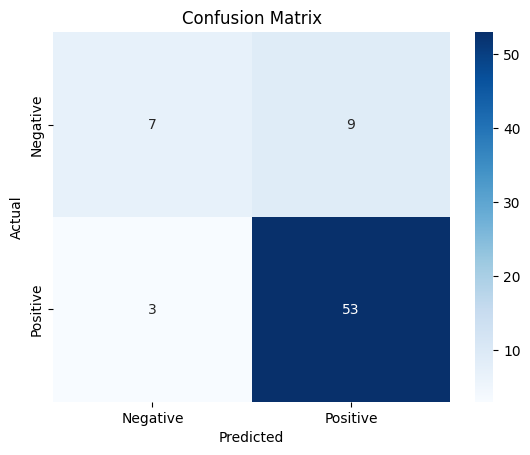

In [41]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
joblib.dump(model, 'model.pkl')

['model.pkl']